# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">Training datasets</a>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries_of_the_world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
# check datatypes
# obj_df["Climate"].value_counts()
for col in df:
    print(df[col].unique())

['Afghanistan ' 'Albania ' 'Algeria ' 'American Samoa ' 'Andorra '
 'Angola ' 'Anguilla ' 'Antigua & Barbuda ' 'Argentina ' 'Armenia '
 'Aruba ' 'Australia ' 'Austria ' 'Azerbaijan ' 'Bahamas, The ' 'Bahrain '
 'Bangladesh ' 'Barbados ' 'Belarus ' 'Belgium ' 'Belize ' 'Benin '
 'Bermuda ' 'Bhutan ' 'Bolivia ' 'Bosnia & Herzegovina ' 'Botswana '
 'Brazil ' 'British Virgin Is. ' 'Brunei ' 'Bulgaria ' 'Burkina Faso '
 'Burma ' 'Burundi ' 'Cambodia ' 'Cameroon ' 'Canada ' 'Cape Verde '
 'Cayman Islands ' 'Central African Rep. ' 'Chad ' 'Chile ' 'China '
 'Colombia ' 'Comoros ' 'Congo, Dem. Rep. ' 'Congo, Repub. of the '
 'Cook Islands ' 'Costa Rica ' "Cote d'Ivoire " 'Croatia ' 'Cuba '
 'Cyprus ' 'Czech Republic ' 'Denmark ' 'Djibouti ' 'Dominica '
 'Dominican Republic ' 'East Timor ' 'Ecuador ' 'Egypt ' 'El Salvador '
 'Equatorial Guinea ' 'Eritrea ' 'Estonia ' 'Ethiopia ' 'Faroe Islands '
 'Fiji ' 'Finland ' 'France ' 'French Guiana ' 'French Polynesia '
 'Gabon ' 'Gambia, The ' 'Gaza St

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [7]:
df.duplicated().sum()

0

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-    Null values       <br>
2-     some columns don't have proper datatype(Object instead of Numeric)      <br>
3-           <br>

In [8]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

are objects , convert to float  :-
- Pop. Density (per sq. mi.) , Coastline (coast/area ratio) , Net migration , Infant mortality (per 1000 births) , Literacy (%)     ,Phones (per 1000) , Arable (%) , Crops (%) , Other (%) ,  Climate ,  Birthrate,  Deathrate ,  Agriculture  ,  Industry  , Service   

**First issue**

In [9]:
#solution 
object_to_numeric = ["Pop. Density (per sq. mi.)" , "Coastline (coast/area ratio)" , "Net migration" , "Infant mortality (per 1000 births)" , "Literacy (%)"                        
 ,"Phones (per 1000)"  , "Arable (%)", "Crops (%)" , "Other (%)"  ,  "Climate"  ,  "Birthrate" ,  "Deathrate" ,  "Agriculture"  ,  "Industry" ,  "Service" ]
for col in object_to_numeric:
    df_copy[col] = df_copy[col].str.replace(",", ".")
    df_copy[col] = pd.to_numeric(df_copy[col])

In [10]:
#test 
# for col in df:
#     print(df[col].unique())

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Second issue**

In [11]:
#solution 
# obj_df[obj_df.isnull().any(axis=1)]

replace_mean = ["Net migration","Infant mortality (per 1000 births)","GDP ($ per capita)","Phones (per 1000)","Arable (%)"
                , "Crops (%)" , "Other (%)", "Birthrate" ,  "Deathrate","Literacy (%)","Climate","Agriculture","Industry" ,"Service"]
# use median instead
for col in replace_mean:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mean())

In [12]:
#test 
df_copy.isnull().sum(axis=0)

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Third issue**

In [13]:
# df.corr()
# boxplot = df.boxplot(column=["Crops (%)"])

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [15]:
from sklearn import preprocessing

In [16]:
df_scaled = df_copy.copy()
labelEn = preprocessing.LabelEncoder()
df_scaled['Country'] = labelEn.fit_transform(df_scaled['Country'])
df_scaled['Region'] = labelEn.fit_transform(df_scaled['Region'])
df_scaled

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,1,3,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,2,6,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,3,8,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,4,10,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,5,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,223,6,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,224,5,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,225,9,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


In [17]:
# col_names = ["Pop. Density (per sq. mi.)" , "Coastline (coast/area ratio)" , "Net migration" , "Infant mortality (per 1000 births)" , "Literacy (%)"                        
#  ,"Phones (per 1000)"  , "Arable (%)", "Crops (%)" , "Other (%)"  ,  "Climate"  ,  "Birthrate" ,  "Deathrate" ,  "Agriculture"  ,  "Industry" ,  "Service" ]
# features = df_scaled.iloc[:, 2:]

cols = ["Country","Region","Pop. Density (per sq. mi.)" , "Coastline (coast/area ratio)" , "Net migration" , "Infant mortality (per 1000 births)" , "Literacy (%)"                        
 ,"Phones (per 1000)"  , "Arable (%)", "Crops (%)" , "Other (%)"  ,  "Climate"  ,  "Birthrate" ,  "Deathrate" ,  "Agriculture"  ,  "Industry" ,  "Service" ]
features = df_scaled[cols]
features

,Country,Region,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,48.0,0.00,23.060000,163.070000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,1,3,124.6,1.26,-4.930000,21.520000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,2,6,13.8,0.04,-0.390000,31.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,3,8,290.4,58.29,-20.710000,9.270000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,4,10,152.1,0.00,6.600000,4.050000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,5,419.9,0.00,2.980000,19.620000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,223,6,1.0,0.42,0.038125,35.506964,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,224,5,40.6,0.36,0.000000,61.500000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,225,9,15.3,0.00,0.000000,88.290000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


#### MinMax

In [18]:

scaler_MinMax = preprocessing.MinMaxScaler()
df_scaled[cols] = scaler_MinMax.fit_transform(features.values)
df_scaled[cols]



,Country,Region,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.000000,0.0,0.002950,0.000000,1.000000,0.851138,0.223301,0.002897,0.195299,0.004341,0.814759,0.000000,0.904926,0.657559,0.494148,0.248307,0.356502
1,0.004425,0.3,0.007658,0.001447,0.364586,0.101800,0.836165,0.068573,0.339559,0.087214,0.617369,0.666667,0.180018,0.106740,0.301691,0.189616,0.579596
2,0.008850,0.6,0.000848,0.000046,0.467650,0.151985,0.635922,0.075237,0.051844,0.004933,0.947953,0.000000,0.226750,0.084517,0.131339,0.654628,0.264574
3,0.013274,0.8,0.017847,0.066949,0.006356,0.036951,0.963592,0.250435,0.161005,0.295975,0.625019,0.333333,0.349217,0.035701,0.196156,0.296513,0.564219
4,0.017699,1.0,0.009348,0.000000,0.626334,0.009317,1.000000,0.480008,0.035743,0.000000,0.966702,0.666667,0.032689,0.144262,0.196156,0.296513,0.564219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.982301,0.5,0.025806,0.000000,0.544154,0.091742,0.791727,0.140042,0.272098,0.374309,0.461977,0.666667,0.561234,0.059381,0.117035,0.293454,0.636771
223,0.986726,0.6,0.000061,0.000482,0.477369,0.175844,0.791727,0.227797,0.000322,0.000000,0.999700,0.000000,0.341269,0.253237,0.196156,0.296513,0.378924
224,0.991150,0.5,0.002495,0.000413,0.476504,0.313446,0.395631,0.035735,0.044759,0.004736,0.954702,0.000000,0.819521,0.218944,0.175553,0.510158,0.371076
225,0.995575,0.9,0.000940,0.000000,0.476504,0.455267,0.764563,0.007726,0.113991,0.000592,0.893505,0.333333,0.776013,0.642623,0.286086,0.304740,0.478700


In [19]:
# category_columns = df_copy.iloc[:,0:2]
# # category_columns

In [20]:
# df_scaled_2 = pd.concat([df_scaled, category_columns], axis=1)
# df_scaled

#### Standard

In [21]:
scaler_Standard = preprocessing.StandardScaler().fit(features.values)
scaler_Standard

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaler_Standard.mean_

array([1.13000000e+02, 5.73127753e+00, 3.79047137e+02, 2.11653304e+01,
       3.81250000e-02, 3.55069643e+01, 8.28382775e+01, 2.36061435e+02,
       1.37971111e+01, 4.56422222e+00, 8.16383111e+01, 2.13902439e+00,
       2.21147321e+01, 9.24134529e+00, 1.50844340e-01, 2.82710900e-01,
       5.65283019e-01])

In [23]:
scaler_Standard.scale_

array([6.55286197e+01, 3.35729066e+00, 1.65652499e+03, 7.21274652e+01,
       4.84600049e+00, 3.50767077e+01, 1.88787616e+01, 2.25466924e+02,
       1.29539455e+01, 8.30603397e+00, 1.60338225e+01, 6.63018743e-01,
       1.10778048e+01, 4.93476394e+00, 1.41529933e-01, 1.32993878e-01,
       1.59889596e-01])

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

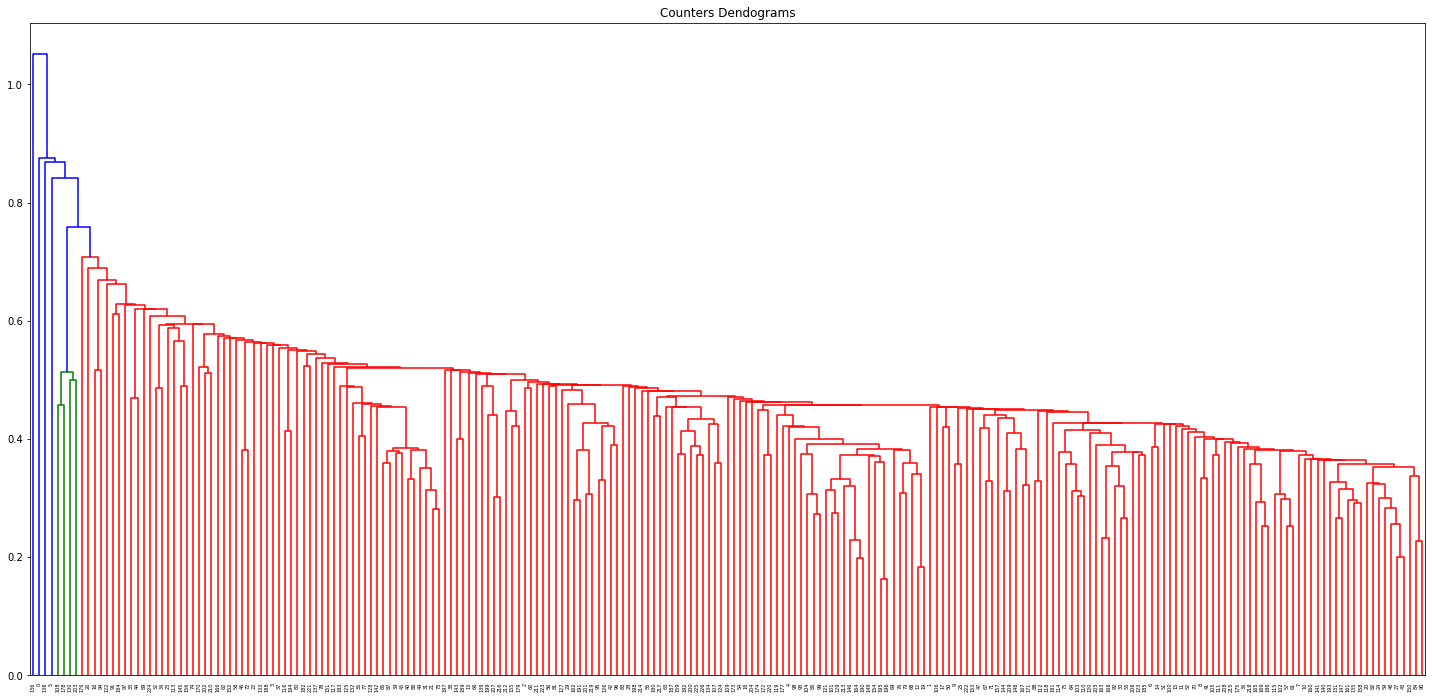

In [33]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25, 12))
plt.title("Counters Dendograms")
# dend = shc.dendrogram(shc.linkage(y=df_scaled[col_names] , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe #and method with linkage criteria  #and metric with distance function
dend = shc.dendrogram(shc.linkage(y=df_scaled[cols] , method='single',metric='euclidean'))

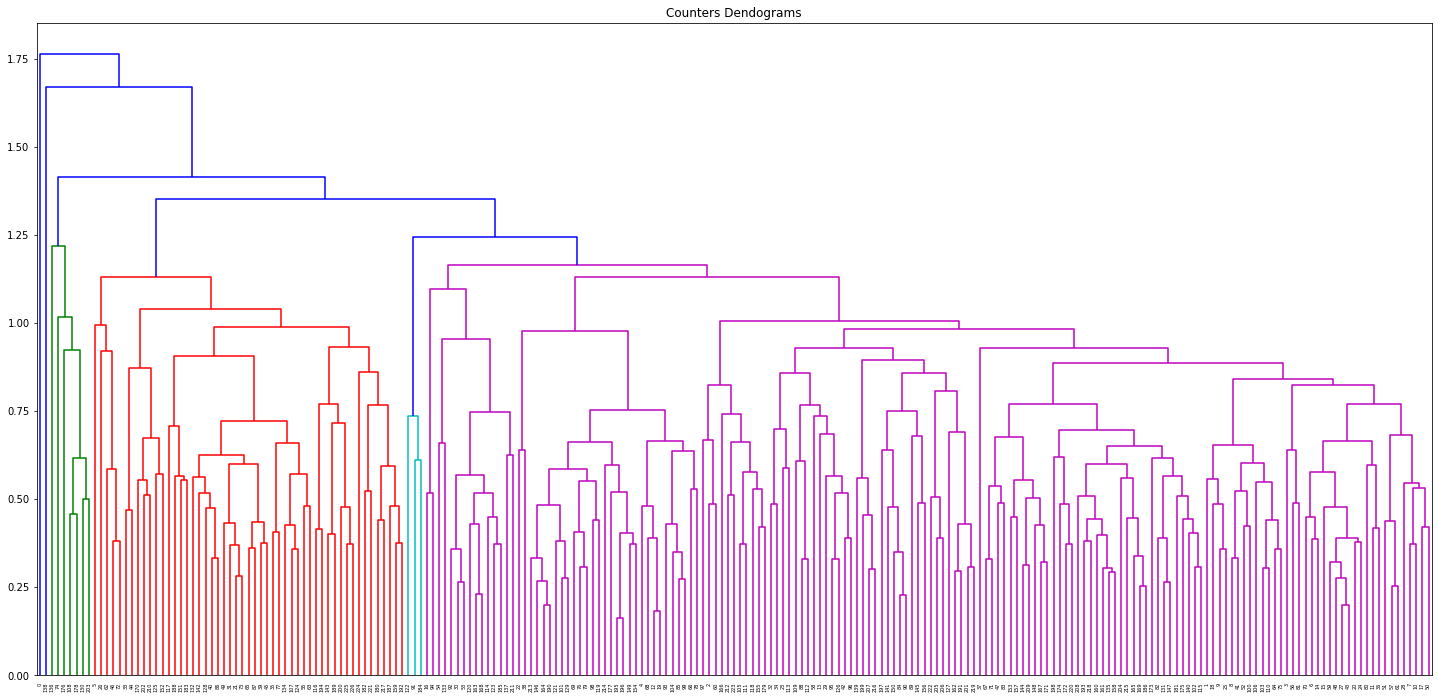

In [34]:


plt.figure(figsize=(25, 12))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scaled[cols] , method='average',metric='euclidean'))

In [37]:
#training
from sklearn.cluster import AgglomerativeClustering

clustring = AgglomerativeClustering(n_clusters=3).fit(df_scaled[cols])
clustring


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [38]:
clustring.labels_

array([2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0,
       1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1,
       0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2,
       0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 0], dtype=int64)